# Name: Praveen Balireddy
# Roll: 2018201052

## Aim:
Implement a Neural Network from scratch and try out different activation functions to understand the variance of performance with different hyperparameters

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
'''
Setting seed
'''
np.random.seed(10)

In [3]:
'''
Function to split the data into train and validation(80-20)
'''
def splitData(X ,Y, t_size = 0.2, r_state = 10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = t_size , random_state = r_state)
    return (X_train, X_test, y_train, y_test)

## Read Input

In [4]:
df = pd.read_csv("./Apparel/apparel-trainval.csv")

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [7]:
X_train, X_val, y_train, y_val = splitData(df.iloc[:,df.columns != 'label'], df.iloc[:,df.columns == 'label'])

In [8]:
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,0.001063,0.005854,0.035521,0.098000,0.240437,0.401625,0.786854,2.162375,5.681000,14.429896,...,34.607896,23.352625,16.598604,17.852687,22.837375,17.942271,8.508979,2.793146,0.877208,0.074938
std,0.104976,0.244669,1.282235,2.360467,4.138129,5.670258,8.081382,13.860705,23.872193,38.304994,...,57.483728,48.867544,41.933593,43.889334,51.828539,45.184036,29.515845,17.532829,9.512385,2.270383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,34.000000,226.000000,164.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,248.000000,255.000000,255.000000,170.000000


### Util Functions

In [98]:
def ReLU(x):
    '''
    Activation function - Rectified Linear Unit
    '''
    return np.maximum(x, 0)

def sigmoid(x):
    '''
    Activation function - Sigmoid
    '''
    y = 1/(1+np.exp(-x))
    return y

def softmax(x):
    '''
    Activation function - softmax 
    '''
    y = np.exp(x)
    res = y / np.sum(y, axis=1, keepdims=True)
    return np.nan_to_num(res)

def crossEntropy(y, yhat):
    '''
    Loss Function - Cross Entropy
    '''
    e = np.multiply(y, np.log(1e-10+yhat)) + np.multiply(1-y, np.log(1e-10+1-yhat))
    return -1/len(y)*np.mean(np.sum(e, axis=0))

def plotLossCurve(myNN):
    '''
    Function to plot the Loss vs Iteration Number
    '''
    ax = plt.subplot()
    ax.plot(list(range(len(myNN.costs))), myNN.costs)
    ax.set_title("Cross Entropy loss vs Iteration")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Loss")
    plt.show()

def plotLossCurves(myNNs, acts):
    '''
    Function to plot the Loss vs Iteration Number for different activation functions
    '''
    ax = plt.subplot()
    for myNN, act in zip(myNNs, acts):
        ax.plot(list(range(len(myNN.costs))), myNN.costs, label = act)
        ax.set_title("Cross Entropy loss vs Iteration")
        ax.set_xlabel("Iteration Number")
        ax.set_ylabel("Loss")
        ax.legend(loc = "upper right")
    plt.show()

def plotErrorCurve(myNN):
    '''
    Function to plot the Error vs Iteration Number
    '''
    ax = plt.subplot()
    ax.plot(list(range(len(myNN.errors))), myNN.errors)
    ax.set_title("Error vs Iteration")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Error")
    plt.show()

## Question 1 : Train and validate your own n-layer Neural Network on the Apparel dataset to predict the class label of a given apparel

### My Neural Network

In [10]:
class MyNeuralNet:
    def __init__(self, input_layer, hidden_layers, output_layer, alpha, iterations, batch_size = 256,
                 hidden_activation = 'relu', output_activation = 'sigmoid'):
        '''
        Initializing the neural network parameters
        '''
        self.layers = [input_layer] + hidden_layers + [output_layer]
        self.input_layer = input_layer
        self.hidden_activation = hidden_activation
        self.output_layer = output_layer
        self.output_activation = output_activation
        self.alpha = alpha
        self.iterations = iterations
        self.batch_size = batch_size
        self.dz = []
        self.da = []
        self.dw = []
        self.W = []
        self.db = []
        self.z = []
        self.a = []
        self.b = []
        self.yhat = None
        self.initialize_weights()
        self.scalar = None
        
    def loadWeights(self, path = "./weights/weights.pickle"):
        '''
        Load weights/bias/standard scalar
        '''
        with open(path, 'rb') as handle:
            weights = pickle.load(handle)
        self.W = weights['w']
        self.b = weights['b']
        self.scalar = weights['scalar']

    def saveWeights(self, path = "./weights/weights.pickle"):
        '''
        Save weights/bias/standard scalar
        '''
        weights = {}
        weights['w'] = self.W
        weights['b'] = self.b
        weights['scalar'] = self.scalar
        with open(path, 'wb') as handle:
            pickle.dump(weights, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    def standardize(self, X_train):
        '''
        Standardize the input data 
        '''
        if(self.scalar is None):
            scalar = StandardScaler()
            self.scalar = scalar.fit(X_train)
        return self.scalar.transform(X_train)
    
    def initialize_weights(self):
        '''
        Initializing the weights and bias
        '''
        np.random.seed(10) ## Setting the seed
        for i in range(len(self.layers)-1):
            wt = np.random.randn(self.layers[i+1],self.layers[i])*np.sqrt(2/self.layers[i])
            w = wt.T
#             w = np.random.randn(self.layers[i],self.layers[i+1])*np.sqrt(2/self.layers[i])
            self.W.append(w)
            b = np.ones(self.layers[i+1]).reshape(1,-1)
            self.b.append(b)
        
    def train(self, X_train, Y_train):
        '''
        Training the neural network model
        '''
        if(len(Y_train) == 1):
            # Converting the 1-d array to 2-d
            X_train = X_train.values.reshape(1,-1)
            Y_train = Y_train.values.reshape(1,-1)
        else:
            X_train = X_train.values
            Y_train = Y_train.values
        X_train = self.standardize(X_train)
        onehot_encoder = OneHotEncoder(n_values=10,sparse=False) ## One hot encode of the output labels
        encoded_y = onehot_encoder.fit_transform(Y_train)
        self.costs = []
        self.errors = []
        for i in range(self.iterations):
            '''
            Running batch gradient descendent
            '''
            offset = 0
            while(True):
                start = offset
                end = min(offset + self.batch_size, len(X_train))
                self.forward_propagation(X_train[start:end, :])
                self.backward_propagation(encoded_y[start:end, :], self.yhat[start:end], self.alpha)
                offset += self.batch_size
                if(offset >= len(X_train)):
                    break
            self.costs.append(crossEntropy(encoded_y, self.yhat)) ## Append the epoch loss
            res = np.argmax(self.yhat, axis=1)
            self.errors.append(1 - metrics.accuracy_score(Y_train, res)) ## Append the epoch error
            self.yhat = None
            
    def forward_propagation(self, X_train):
        '''
        Forward propagation: called for each batch 
        '''
        a = X_train
        self.a.append(a)
        for i in range(len(self.W)):
            z = np.dot(a, self.W[i]) + self.b[i]
            self.z.append(z)
            if(i == len(self.W)-1):
                '''
                Output layer
                '''
                if(self.yhat is None):
                    self.yhat = softmax(z)
                else:
                    self.yhat = np.append(self.yhat, softmax(z), axis=0)
            else:
                '''
                Hidden layers
                '''
                if(self.hidden_activation == "relu"):
                    a = ReLU(z)
                elif(self.hidden_activation == "sigmoid"):
                    a = sigmoid(z)
                elif(self.hidden_activation == "tanh"):
                    a = np.tanh(z)
                self.a.append(a)
    
    def reset_layer_metrics(self):
        '''
        Resetting the internal forward/backward data arrays
        '''
        self.dz = []
        self.da = []
        self.dw = []
        self.db = []
        self.z = []
        self.a = []
    
    def backward_propagation(self, Y_train, yhat, alpha):
        '''
        backward propagation: called for each batch after call to forward propagation
        '''
        temp_W = self.W.copy()
        m = len(Y_train)
        for i in range(len(self.W)-1, -1, -1):
            if(i == len(self.W)-1):
                '''
                Ouput layer
                '''
                dz_temp = (yhat - Y_train)
            else:
                '''
                Hidden layers
                '''
                if(self.hidden_activation == "relu"):
                    dz_temp = np.multiply(np.dot(self.dz[-1], temp_W[i+1].T), (self.a[i+1] > 0).astype(int)) # For RELU
                elif(self.hidden_activation == "sigmoid"):
                    dz_temp = np.multiply(np.dot(self.dz[-1], temp_W[i+1].T), np.multiply(self.a[i+1], 1 - self.a[i+1])) # For Sigmoid
                elif(self.hidden_activation == "tanh"):
                    dz_temp = np.multiply(np.dot(self.dz[-1], temp_W[i+1].T), 1 - np.square(np.tanh(self.a[i+1]))) # For tanh
            self.dz.append(dz_temp) ## delta
            db_temp = (1/m)*np.sum(dz_temp, axis=0, keepdims=True) ## db
            self.db.append(db_temp)
            dw_temp = (1/m)*np.dot(self.a[i].T, dz_temp) ## dw
            self.dw.append(dw_temp)
            
            ## Updating the weight and bais of the layer i
            self.W[i] = self.W[i] - alpha*dw_temp
            self.b[i] = self.b[i] - alpha*db_temp
        self.reset_layer_metrics()
    
    def printWeights(self):
        '''
        print the current weights/bias
        '''
        print(self.W)
        print(self.b)
    
    def predict(self, X_test):
        '''
        predict the output labels for the given test input
        '''
        self.yhat = None
        self.reset_layer_metrics()
        X_test = np.array(X_test)
        X_test = self.standardize(X_test)
        self.forward_propagation(X_test)
        res = self.yhat.copy()
        self.test_yhat_encoded = res
        res = np.argmax(res, axis=1)
        return res
    
    def Loss(self, X_test, y_test):
        '''
        Return the Loss of the test dataset
        '''
        self.yhat = None
        self.reset_layer_metrics()
        X_test = np.array(X_test)
        X_test = self.standardize(X_test)
        self.forward_propagation(X_test)
        res = self.yhat.copy()
        onehot_encoder = OneHotEncoder(n_values=10,sparse=False) ## One hot encode of the output labels
        encoded_y = onehot_encoder.fit_transform(y_test)
        return crossEntropy(encoded_y, res)

### Implementation Details:
1. Softmax was used in the output layer for all the different combinations
2. Cross Entropy was used as the loss function
3. Played around with "relu", "sigmoid", "tanh" as the hidden layer activation functions
4. Created multiple plots for contrasting between the different combinations

### Flag to check if weights to be loaded/saved

In [54]:
load_flag = False

### Activation - RELU (Best performing Architecture)

In [57]:
myNN1 = MyNeuralNet(784, [38, 38], 10, 0.2, 50, batch_size=512, hidden_activation="relu")

In [58]:
if(load_flag):
    myNN1.loadWeights("./weights/reluWeights.pickle")
else:
    myNN1.train(X_train, y_train)
    myNN1.saveWeights("./weights/reluWeights.pickle")

In [59]:
pred = myNN1.predict(X_val)

In [60]:
print("Accuracy: {0}".format(metrics.accuracy_score(y_val, pred)))

Accuracy: 0.8734166666666666


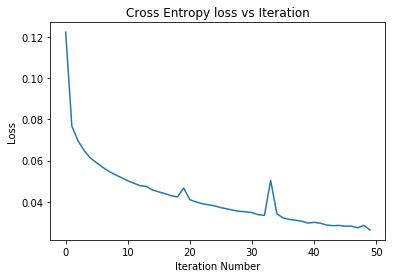

In [61]:
plotLossCurve(myNN1)

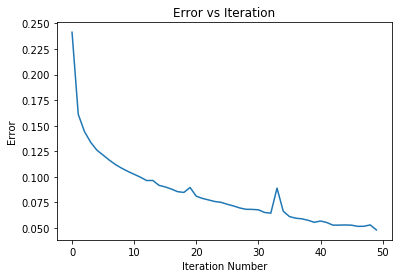

In [62]:
plotErrorCurve(myNN1)

### Saving the prediction on test dataset

In [63]:
test_df = pd.read_csv("./apparel-test.csv")

In [64]:
test_pred = myNN1.predict(test_df)

In [65]:
outfile = "2018201052_prediction.csv"
pd.DataFrame(test_pred).to_csv(outfile, sep=',', index=False, header = None)

### Activation - Sigmoid

In [66]:
myNN2 = MyNeuralNet(784, [38, 38], 10, 0.2, 50, batch_size=512, hidden_activation="sigmoid")

In [67]:
if(load_flag):
    myNN2.loadWeights("./weights/sigmoidWeights.pickle")
else:
    myNN2.train(X_train, y_train)
    myNN2.saveWeights("./weights/sigmoidWeights.pickle")

In [68]:
pred = myNN2.predict(X_val)

In [69]:
print("Accuracy: {0}".format(metrics.accuracy_score(y_val, pred)))

Accuracy: 0.87525


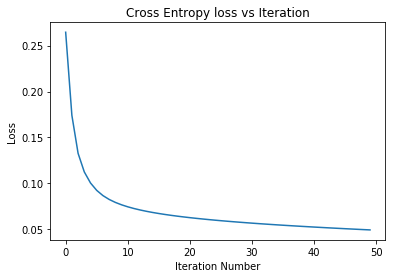

In [70]:
plotLossCurve(myNN2)

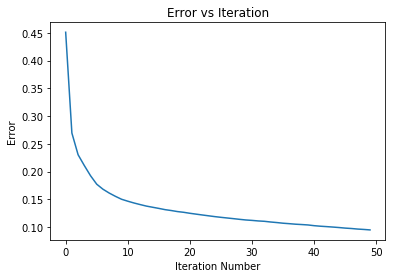

In [71]:
plotErrorCurve(myNN2)

### Activation - Tanh

In [74]:
myNN3 = MyNeuralNet(784, [38, 38], 10, 0.2, 50, batch_size=512, hidden_activation="tanh")

In [75]:
if(load_flag):
    myNN3.loadWeights("./weights/tanhWeights.pickle")
else:
    myNN3.train(X_train, y_train)
    myNN3.saveWeights("./weights/tanhWeights.pickle")

In [76]:
pred = myNN3.predict(X_val)

In [77]:
print("Accuracy: {0}".format(metrics.accuracy_score(y_val, pred)))

Accuracy: 0.8705


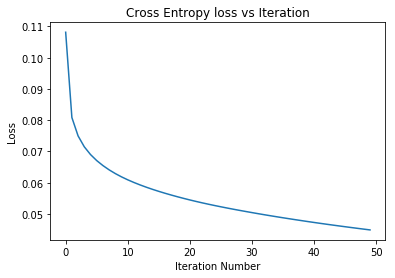

In [78]:
plotLossCurve(myNN3)

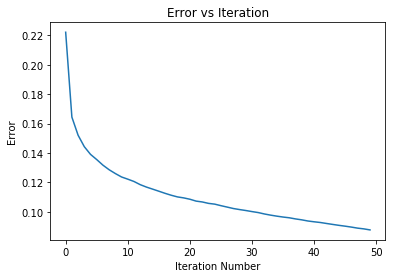

In [79]:
plotErrorCurve(myNN3)

### Comparision of different activation functions

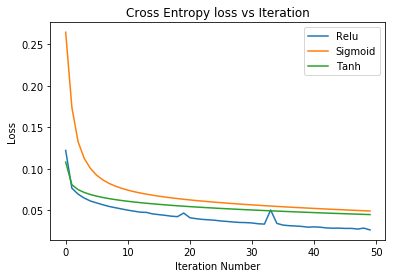

In [97]:
plotLossCurves([myNN1, myNN2, myNN3], ["Relu", "Sigmoid", "Tanh"])

### Plotting Loss with number of hidden layers with sigmoid as activation function

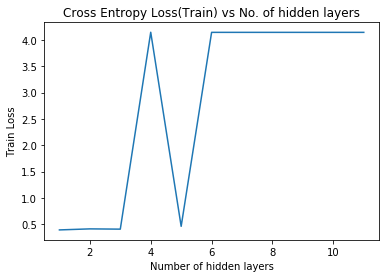

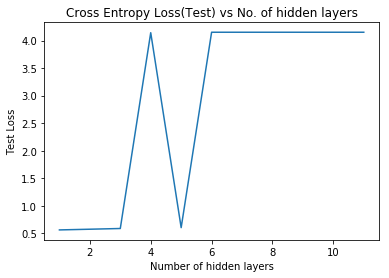

In [80]:
loss = []
loss_train = []
for hidden in range(1,12):
    myNN4 = MyNeuralNet(784, [38]*hidden, 10, 0.2, 20, batch_size=512, hidden_activation="relu")
    if(load_flag):
        myNN4.loadWeights("./weights/weights_" + str(hidden))
    else:
        myNN4.train(X_train, y_train)
        myNN4.saveWeights("./weights/weights_" + str(hidden))
    ## For test
    pred = myNN4.predict(X_val)
    encoded_y = OneHotEncoder(n_values=10,sparse=False).fit_transform(y_val)
    encoded_yhat = OneHotEncoder(n_values=10,sparse=False).fit_transform(np.array(pred).reshape(len(pred),1))
    loss.append(crossEntropy(encoded_y, encoded_yhat))
    ## For train
    pred = myNN4.predict(X_train)
    encoded_y = OneHotEncoder(n_values=10,sparse=False).fit_transform(y_train)
    encoded_yhat = OneHotEncoder(n_values=10,sparse=False).fit_transform(np.array(pred).reshape(len(pred),1))
    loss_train.append(crossEntropy(encoded_y, encoded_yhat))
## Train
ax = plt.subplot()
ax.plot(list(range(1,len(loss_train)+1)), loss_train)
ax.set_title("Cross Entropy Loss(Train) vs No. of hidden layers")
ax.set_xlabel("Number of hidden layers")
ax.set_ylabel("Train Loss")
plt.show()
## Test
ax1 = plt.subplot()
ax1.plot(list(range(1,len(loss)+1)), loss)
ax1.set_title("Cross Entropy Loss(Test) vs No. of hidden layers")
ax1.set_xlabel("Number of hidden layers")
ax1.set_ylabel("Test Loss")
plt.show()

### Question 2 - Consider the House Price Prediction dataset. Suppose you need to predict the Sale Price of a house and for the task you want to use a neural network with 3 hidden layers. Write a report on how you would modify your above neural network for such task with proper reasoning.

1. Since it is a regression problem, by keeping the output activation function as f(x) = x will give a linear combination of the hidden layer note, hence giving linear regression with Neural networks.
2. The hidden layer activations can be anything, but it would be preferable to use the function f(x) = x as it is more intuitive for a linear regression, i.e linear combination of input features.
3. The Loss function would be quadratic loss(Mean squared error), i.e, (y-yhat)^2
4. Standardize the data before feeding it to the neural network
5. One hot encoding of the categorical variables

# Report:
## Best performing architecture:
1. No. of Hidden layers: 2 layers with 38 nodes each
2. No. of epochs: 10
3. Batch Size: 512
4. Learning rate: 0.2
5. Activation Function: Relu
6. Loss Function: Cross Entropy

## Challenges and observations:
1. Initally the gradient was overflowing and resulting in Nan, but fixed using standardization of input data, changing the output layer activation from sigmoid to softmax and initializing the values using Xavier’s Random Weight Initialization
2. Relu does not have the problem of gradient saturation as it is linear, unlike tanh and sigmoid
3. The loss/error sharply decreases during the first few iterations and then the rate slowly decreases
4. With 38 nodes in a layer, increasing the number of hidden layers doesn't have too big an effect on the accuracy